# 29.
실패율


https://school.programmers.co.kr/learn/courses/30/lessons/42889

**문제 설명**

    슈퍼 게임 개발자 오렐리는 큰 고민에 빠졌다. 그녀가 만든 프랜즈 오천성이 대성공을 거뒀지만, 요즘 신규 사용자의 수가 급감한 것이다. 원인은 신규 사용자와 기존 사용자 사이에 스테이지 차이가 너무 큰 것이 문제였다.

    이 문제를 어떻게 할까 고민 한 그녀는 동적으로 게임 시간을 늘려서 난이도를 조절하기로 했다. 역시 슈퍼 개발자라 대부분의 로직은 쉽게 구현했지만, 실패율을 구하는 부분에서 위기에 빠지고 말았다. 오렐리를 위해 실패율을 구하는 코드를 완성하라.

    실패율은 다음과 같이 정의한다.
    스테이지에 도달했으나 아직 클리어하지 못한 플레이어의 수 / 스테이지에 도달한 플레이어 수
    전체 스테이지의 개수 N, 게임을 이용하는 사용자가 현재 멈춰있는 스테이지의 번호가 담긴 배열 stages가 매개변수로 주어질 때, 실패율이 높은 스테이지부터 내림차순으로 스테이지의 번호가 담겨있는 배열을 return 하도록 solution 함수를 완성하라.
    
 
**제한 사항**

    스테이지의 개수 N은 1 이상 500 이하의 자연수이다.
    stages의 길이는 1 이상 200,000 이하이다.
    stages에는 1 이상 N + 1 이하의 자연수가 담겨있다.
    각 자연수는 사용자가 현재 도전 중인 스테이지의 번호를 나타낸다.
    단, N + 1 은 마지막 스테이지(N 번째 스테이지) 까지 클리어 한 사용자를 나타낸다.
    만약 실패율이 같은 스테이지가 있다면 작은 번호의 스테이지가 먼저 오도록 하면 된다.
    스테이지에 도달한 유저가 없는 경우 해당 스테이지의 실패율은 0 으로 정의한다.
    
**입출력 예**

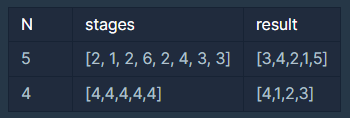


**입출력 예 설명**

    입출력 예 #1
    1번 스테이지에는 총 8명의 사용자가 도전했으며, 이 중 1명의 사용자가 아직 클리어하지 못했다. 따라서 1번 스테이지의 실패율은 다음과 같다.

    1 번 스테이지 실패율 : 1/8
    2번 스테이지에는 총 7명의 사용자가 도전했으며, 이 중 3명의 사용자가 아직 클리어하지 못했다. 따라서 2번 스테이지의 실패율은 다음과 같다.

    2 번 스테이지 실패율 : 3/7
    마찬가지로 나머지 스테이지의 실패율은 다음과 같다.

    3 번 스테이지 실패율 : 2/4
    4번 스테이지 실패율 : 1/2
    5번 스테이지 실패율 : 0/1
    각 스테이지의 번호를 실패율의 내림차순으로 정렬하면 다음과 같다.

    [3,4,2,1,5]
    입출력 예 #2

    모든 사용자가 마지막 스테이지에 있으므로 4번 스테이지의 실패율은 1이며 나머지 스테이지의 실패율은 0이다.

    [4,1,2,3]

In [108]:
import collections

def solution(N, stages):
    answer = []
    fail_rate = {n:0 for n in range(1,N+1)}
    stage_dic = dict(collections.Counter(stages))
    
    for i in range(1,N+1):
        total = sum(stage_dic.values())
        try:
            fail = stage_dic[i]
            del stage_dic[i]
        except:
            fail = 0
        finally:
            fail_rate[i] = fail/total
    
    fail_rate = {k:v for k, v in sorted(fail_rate.items(), reverse=True, key=lambda item:item[1])}
    answer = list(fail_rate.keys())
    
    return answer

In [109]:
print(solution(5, [2, 1, 2, 6, 2, 4, 3, 3]))
print(solution(4, [4,4,4,4,4]))

[3, 4, 2, 1, 5]
[4, 1, 2, 3]


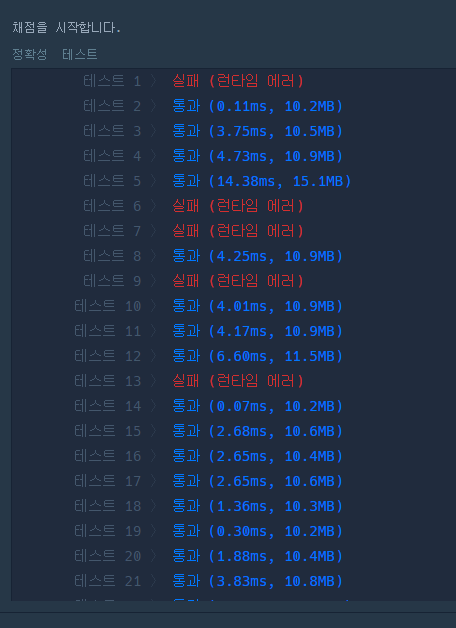
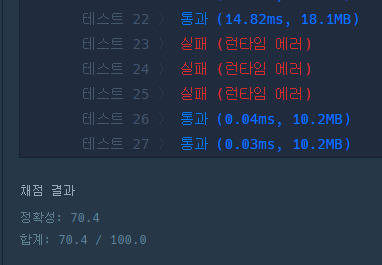


    - 로직이 너무 복잡하다 싶더니.. 런타임 에러남

In [118]:
import collections

def solution(N, stages):
    answer = []
    fail_rating = {n:0 for n in range(1,N+1)}
    counter = dict(collections.Counter(stages))
    
    for i in range(1, N+1):
        total = sum(counter.values())
        try:
            cnt = counter[i]
            del counter[i]
            fail_rating[i] = cnt/total
        except:
            fail_rating[i] = 0
    
    fail_rating = {k:v for k, v in sorted(fail_rating.items(), reverse=True, key=lambda item:item[1])}
    answer = list(fail_rating.keys())
    
    return answer

    - 런타임 에러난 부분에서 try, except 에서 시간을 좀 줄이면 될 것같아서..
    어차피 except로 빠지는 부분은 0일거라서, 그냥 0 넣는걸로 하니까 런타임 오류 해결됨.. 웨우..

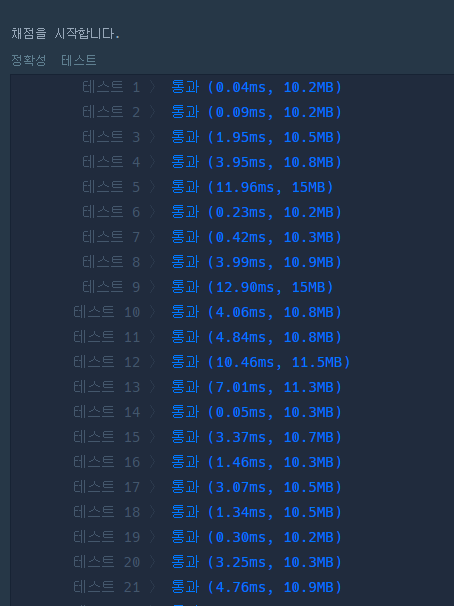
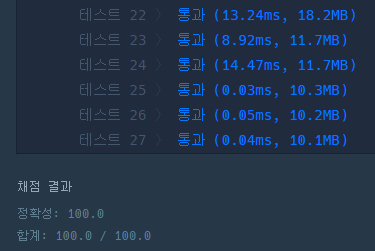

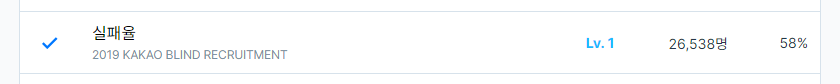

# 30.
체육복

https://school.programmers.co.kr/learn/courses/30/lessons/42862

**문제 설명**

    점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 체육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, 바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 최대한 많은 학생이 체육수업을 들어야 합니다.

    전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return 하도록 solution 함수를 작성해주세요.
    
**제한 사항**

    전체 학생의 수는 2명 이상 30명 이하입니다.
    체육복을 도난당한 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
    여벌의 체육복을 가져온 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
    여벌 체육복이 있는 학생만 다른 학생에게 체육복을 빌려줄 수 있습니다.
    여벌 체육복을 가져온 학생이 체육복을 도난당했을 수 있습니다. 이때 이 학생은 체육복을 하나만 도난당했다고 가정하며, 남은 체육복이 하나이기에 다른 학생에게는 체육복을 빌려줄 수 없습니다.
    
    
**입출력 예**

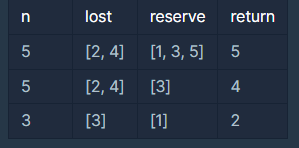


**입출력 예 설명**

    예제 #1
    1번 학생이 2번 학생에게 체육복을 빌려주고, 3번 학생이나 5번 학생이 4번 학생에게 체육복을 빌려주면 학생 5명이 체육수업을 들을 수 있습니다.

    예제 #2
    3번 학생이 2번 학생이나 4번 학생에게 체육복을 빌려주면 학생 4명이 체육수업을 들을 수 있습니다.

    문제가 잘 안풀린다면😢
    힌트가 필요한가요? [코딩테스트 연습 힌트 모음집]으로 오세요! → 클릭

    출처

    ※ 공지 - 2019년 2월 18일 지문이 리뉴얼되었습니다.
    ※ 공지 - 2019년 2월 27일, 28일 테스트케이스가 추가되었습니다.
    ※ 공지 - 2021년 7월 28일 테스트케이스가 추가되었습니다.
    ※ 공지 - 2021년 8월 30일 테스트케이스가 추가되었습니다.
    ※ 공지 - 2022년 11월 30일 테스트케이스가 추가되었습니다.

In [52]:
def solution(n, lost, reserve):
    answer = 0
    all_students = [i for i in range(1,n+1)]
    ok_student = list(set(all_students).difference(set(lost)))
    
    for l in lost:
        before = l-1
        after = l+1
        if before in reserve:
            ok_student.append(l)
            reserve.remove(before)
            continue
        if after in reserve:
            ok_student.append(l)
            reserve.remove(after)
            
    answer = len(ok_student)
    
    return answer

In [51]:
print(solution(5,[2,4],[1,3,5]))
print(solution(5,[2,4],[3]))
print(solution(3,[3],[1]))

5
4
2



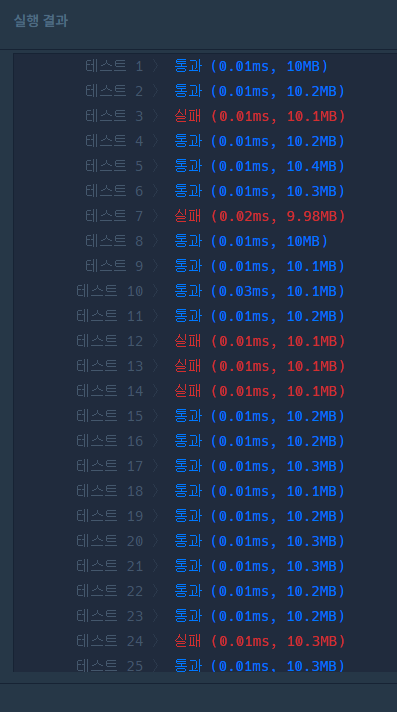

In [62]:
def solution(n, lost, reserve):
    answer = 0
    all_students = [i for i in range(1,n+1)]
    final_lost = list(set(lost).difference(set(reserve)))
    final_reserve = list(set(reserve).difference(set(lost)))
    ok_student = list(set(all_students).difference(set(final_lost)))
    
    for l in final_lost:
        before = l-1
        after = l+1
        if before in final_reserve:
            ok_student.append(l)
            final_reserve.remove(before)
            continue
        if after in final_reserve:
            ok_student.append(l)
            final_reserve.remove(after)
            
    answer = len(ok_student)
    
    return answer

    - 문제에서 주어진, 조건인 여벌의 체육복을 가져온 학생이 체육복을 도난당했을 경우를 로직에 넣지 않아서 실패했었음
    - 들어온 lost, reserve에 대해서 다시 한번 정리해주는 로직을 추가해서 통과!
    
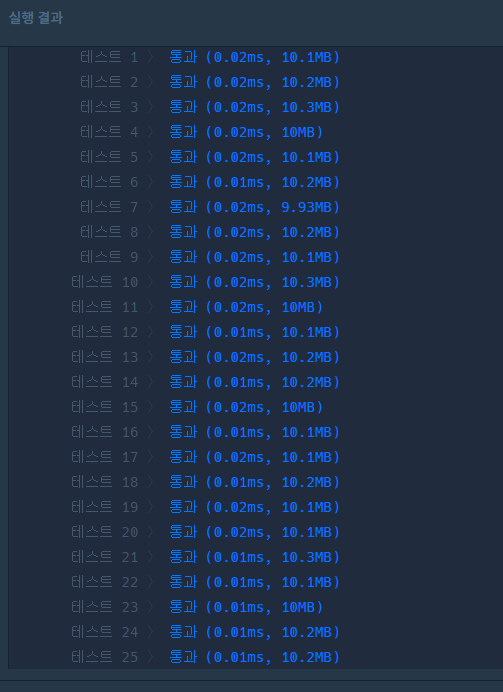

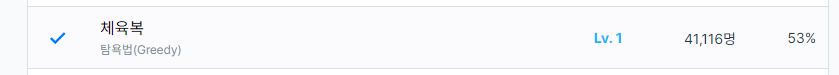

**다른 사람 풀이**

    dict 해서 difference 안쓰고도 그냥 list comprehenstion으로 처리한 사람 코드
    깔끔하고 아름답당
    
 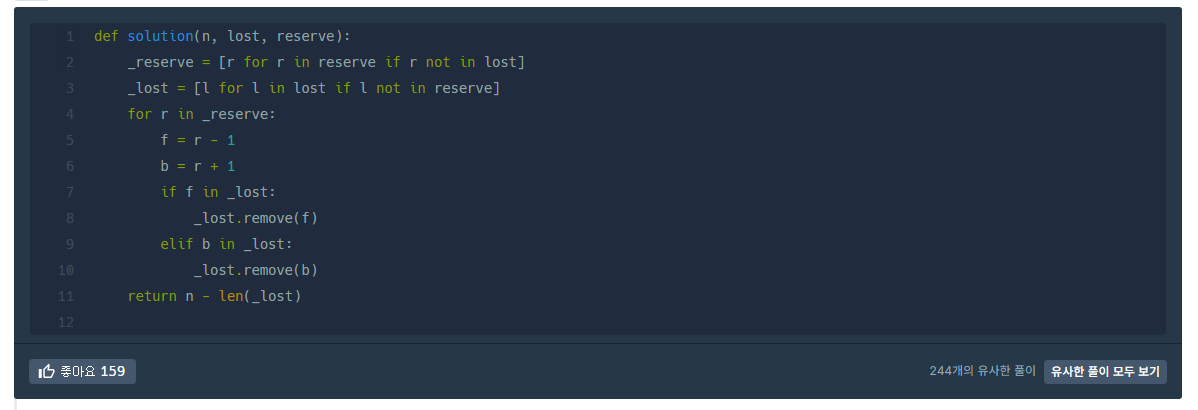   

# 31.
모의고사

https://school.programmers.co.kr/learn/courses/30/lessons/42840


**문제 설명**

    수포자는 수학을 포기한 사람의 준말입니다. 수포자 삼인방은 모의고사에 수학 문제를 전부 찍으려 합니다. 수포자는 1번 문제부터 마지막 문제까지 다음과 같이 찍습니다.

    1번 수포자가 찍는 방식: 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, ...
    2번 수포자가 찍는 방식: 2, 1, 2, 3, 2, 4, 2, 5, 2, 1, 2, 3, 2, 4, 2, 5, ...
    3번 수포자가 찍는 방식: 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, 3, 3, 1, 1, 2, 2, 4, 4, 5, 5, ...

    1번 문제부터 마지막 문제까지의 정답이 순서대로 들은 배열 answers가 주어졌을 때, 가장 많은 문제를 맞힌 사람이 누구인지 배열에 담아 return 하도록 solution 함수를 작성해주세요.
    
**제한 조건**

    시험은 최대 10,000 문제로 구성되어있습니다.
    문제의 정답은 1, 2, 3, 4, 5중 하나입니다.
    가장 높은 점수를 받은 사람이 여럿일 경우, return하는 값을 오름차순 정렬해주세요.
    
**입출력 예**

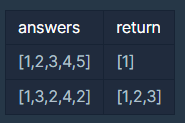


**입출력 예**

    입출력 예 #1

    수포자 1은 모든 문제를 맞혔습니다.
    수포자 2는 모든 문제를 틀렸습니다.
    수포자 3은 모든 문제를 틀렸습니다.
    따라서 가장 문제를 많이 맞힌 사람은 수포자 1입니다.

    입출력 예 #2

    모든 사람이 2문제씩을 맞췄습니다.

In [26]:
def solution(answers):
    answer = []
    
    a = [1,2,3,4,5] * 2000
    b = [2,1,2,3,2,4,2,5] * 1250
    c = [3,3,1,1,2,2,4,4,5,5] *1000
    
    correct_dic = {1:0, 2:0, 3:0}
    
    for idx, ans in enumerate(answers):
        if answers[idx] == a[idx] : correct_dic[1]+=1
        if answers[idx] == b[idx] : correct_dic[2]+=1
        if answers[idx] == c[idx] : correct_dic[3]+=1

    high = max(correct_dic.values())
    for k,v in correct_dic.items():
        if v >=high:
            answer.append(k)
                  
    
    return answer

In [27]:
print(solution([1,2,3,4,5]))
print(solution([1,3,2,4,2]))

[1]
[1, 2, 3]


    - 일단 나는 딕셔너리 괴물,, 무조건 일단 쓰고 보는거 enumerate와 dictionary ㅋㅎ
    제한 사항에서 answers가 10,000 이라는 것 그리고, 처음에 1,2,3명의 리스트 길이가 10,000으로 맞아 떨어진다는 것을 보고
    두개를 잘 핸들링 해봐야 한다고 생각해서 10,000으로 리스트 길이 배열을 맞춤
    
    - 그 뒤에 인덱스를 활용해서 맞은 개수만큼 correct_dic 으로 dictionary를 생성하고, 딕셔너리에서의 max를 비교해서
    return 하도록 풀었음
    

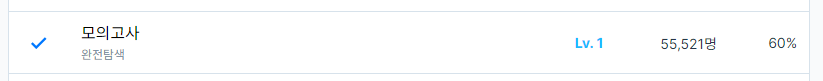

**다른 사람 풀이**
    
    나는 수작업으로 곱했지만, cycle이라는 내장함수가 있었음
    
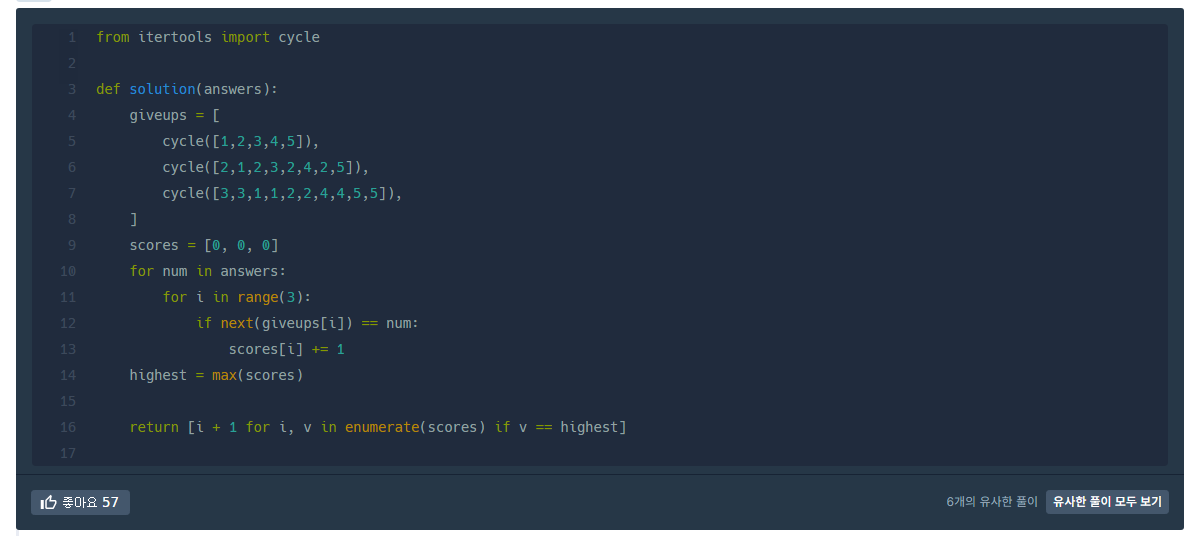

In [9]:
from itertools import cycle

one = cycle([1,2,3,4,5])

for i in range(5):
    print(next(one))

1
2
3
4
5


In [22]:
answers = [1,3,2,4,2]
cycles = [cycle([1,2,3,4,5]), cycle([2,1,2,3,2,4,2,5]), cycle([3,3,1,1,2,2,4,4,5,5])]

for ans in answers:
    print(f"ans -> {ans}")
    for i in range(3):
        print(next(cycles[i]))

ans -> 1
1
2
3
ans -> 3
2
1
3
ans -> 2
3
2
1
ans -> 4
4
3
1
ans -> 2
5
2
2


    그리고 가장 많은 좋아요를 받은
    
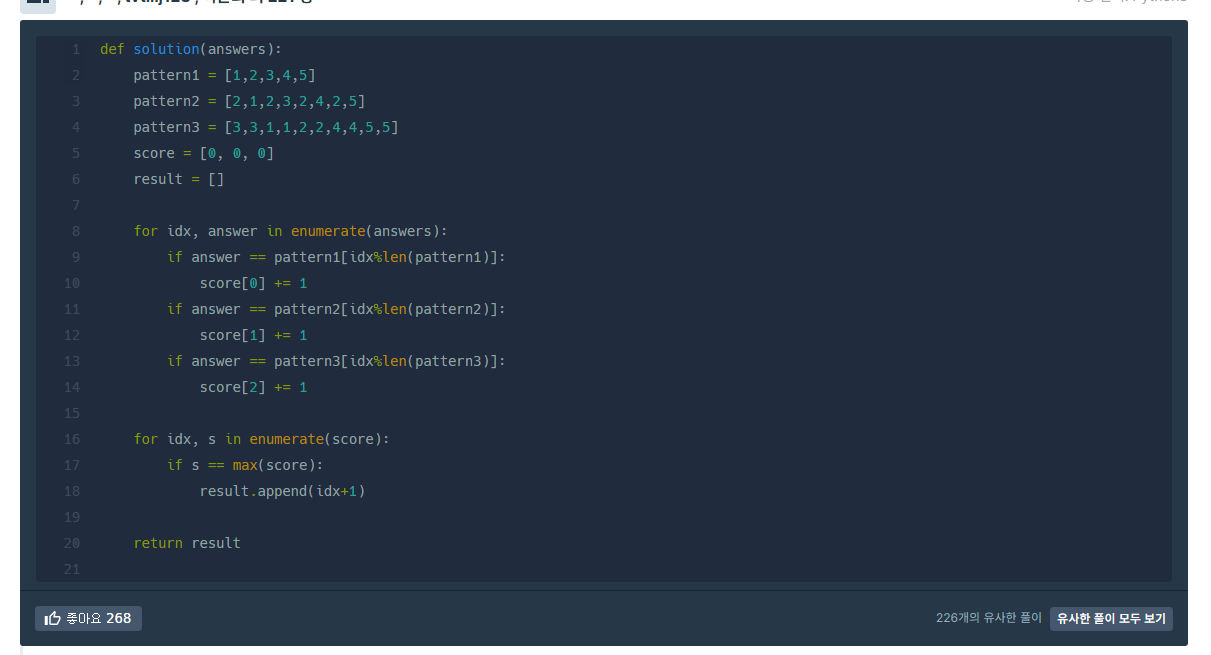

    내 방식대로 짜면.. 남의 코드 잘안보임.. 조졌다

# 32.
k번째 수

https://school.programmers.co.kr/learn/courses/30/lessons/42748

**문제 설명**

    배열 array의 i번째 숫자부터 j번째 숫자까지 자르고 정렬했을 때, k번째에 있는 수를 구하려 합니다.

    예를 들어 array가 [1, 5, 2, 6, 3, 7, 4], i = 2, j = 5, k = 3이라면

    array의 2번째부터 5번째까지 자르면 [5, 2, 6, 3]입니다.
    1에서 나온 배열을 정렬하면 [2, 3, 5, 6]입니다.
    2에서 나온 배열의 3번째 숫자는 5입니다.
    배열 array, [i, j, k]를 원소로 가진 2차원 배열 commands가 매개변수로 주어질 때, commands의 모든 원소에 대해 앞서 설명한 연산을 적용했을 때 나온 결과를 배열에 담아 return 하도록 solution 함수를 작성해주세요.

**제한사항**

    array의 길이는 1 이상 100 이하입니다.
    array의 각 원소는 1 이상 100 이하입니다.
    commands의 길이는 1 이상 50 이하입니다.
    commands의 각 원소는 길이가 3입니다.
    
**입출력 예**

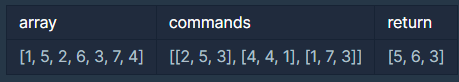

**입출력 예 설명**

    [1, 5, 2, 6, 3, 7, 4]를 2번째부터 5번째까지 자른 후 정렬합니다. [2, 3, 5, 6]의 세 번째 숫자는 5입니다.
    [1, 5, 2, 6, 3, 7, 4]를 4번째부터 4번째까지 자른 후 정렬합니다. [6]의 첫 번째 숫자는 6입니다.
    [1, 5, 2, 6, 3, 7, 4]를 1번째부터 7번째까지 자릅니다. [1, 2, 3, 4, 5, 6, 7]의 세 번째 숫자는 3입니다.

In [11]:
def solution(array, commands):
    answer = []
    for idx in range(0,len(commands)):
        i = commands[idx][0]
        j = commands[idx][1]
        k = commands[idx][2]
    
        tmp_lst = array[i-1:j]
        tmp_lst.sort()
        answer.append(tmp_lst[k-1])

    return answer

In [12]:
print(solution([1, 5, 2, 6, 3, 7, 4], [[2, 5, 3], [4, 4, 1], [1, 7, 3]]))

[5, 6, 3]


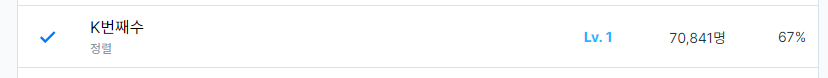

**다른 사람 풀이**

- i,j,k 한번에 넣을 수 있다는거... 잊어버림 우씌

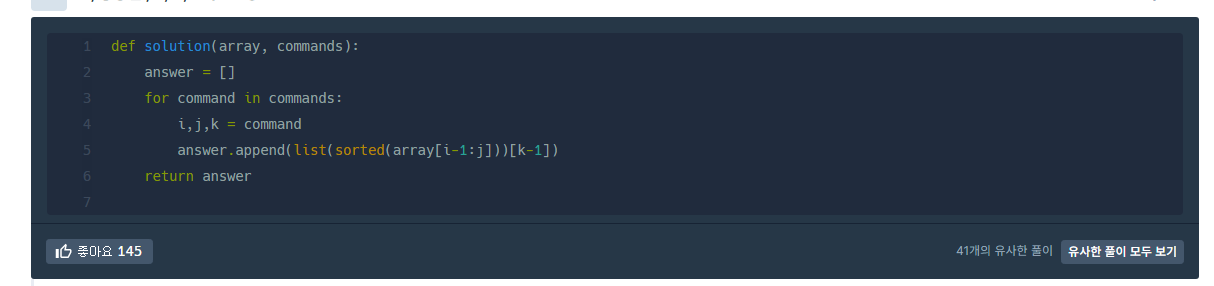

In [13]:
commands = [[2, 5, 3], [4, 4, 1], [1, 7, 3]]

for command in commands:
    i,j,k = command
    print(i,j,k)

2 5 3
4 4 1
1 7 3


    - lambda로 끝내버린 한 줄 코드
    
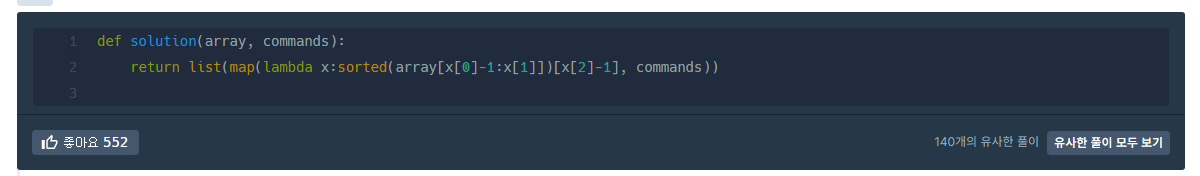

# 33.
완주하지 못한 선수

https://school.programmers.co.kr/learn/courses/30/lessons/42576

**문제 설명**

    수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다.

    마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return 하도록 solution 함수를 작성해주세요.

**제한 사항**

    마라톤 경기에 참여한 선수의 수는 1명 이상 100,000명 이하입니다.
    completion의 길이는 participant의 길이보다 1 작습니다.
    참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
    참가자 중에는 동명이인이 있을 수 있습니다.


**입출력 예**

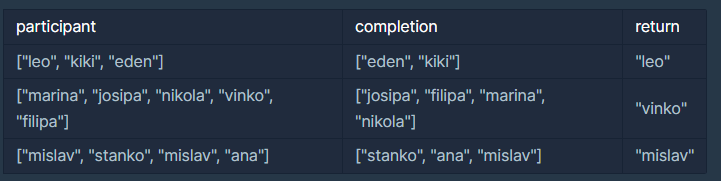

**입출력 예 설명**

    예제 #1
    "leo"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

    예제 #2
    "vinko"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

    예제 #3
    "mislav"는 참여자 명단에는 두 명이 있지만, 완주자 명단에는 한 명밖에 없기 때문에 한명은 완주하지 못했습니다.

In [14]:
def solution(participant, completion):
    answer = ''
    participant.sort()
    completion.sort()
    for c in completion:
        if c in participant : participant.remove(c)
    
    answer+= ''.join(participant)
    
    return answer

In [15]:
print(solution(["leo", "kiki", "eden"], ["eden", "kiki"]))
print(solution(["marina", "josipa", "nikola", "vinko", "filipa"], ["josipa", "filipa", "marina", "nikola"]))
print(solution(["mislav", "stanko", "mislav", "ana"], ["stanko", "ana", "mislav"]))


leo
vinko
mislav


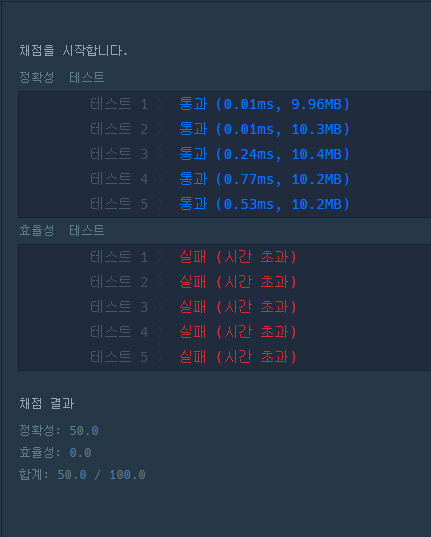


- 정확도는 있었지만 효율성에서 박살난 코드 

In [16]:
def solution(participant, completion):
    answer = ''
    
    participant.sort()
    completion.sort()
    
    for x,y in zip(participant, completion):
        if x!=y:
            answer +=x
            break
    
    if len(answer) ==0:
        answer += participant[-1]
    
    return answer

In [17]:
print(solution(["leo", "kiki", "eden"], ["eden", "kiki"]))
print(solution(["marina", "josipa", "nikola", "vinko", "filipa"], ["josipa", "filipa", "marina", "nikola"]))
print(solution(["mislav", "stanko", "mislav", "ana"], ["stanko", "ana", "mislav"]))

leo
vinko
mislav



    드디어.. 완주하지 못한 선수에서 완주한 선수가 됨
    
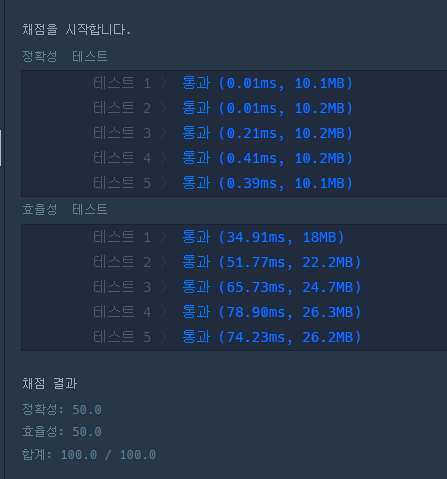

    문제에서 항상 participant는 completion 보다 1 짧다고 해서 다시 구현한 코드임
    저건 1명일 때만 잡을 수 있는 코드인 것이다~
    
**다른 사람 풀이**

    collections 모듈을 임포트해서 쓴 풀이가 있었음 
    counter 끼리도 연산이 된다는걸 알았음 굿
    
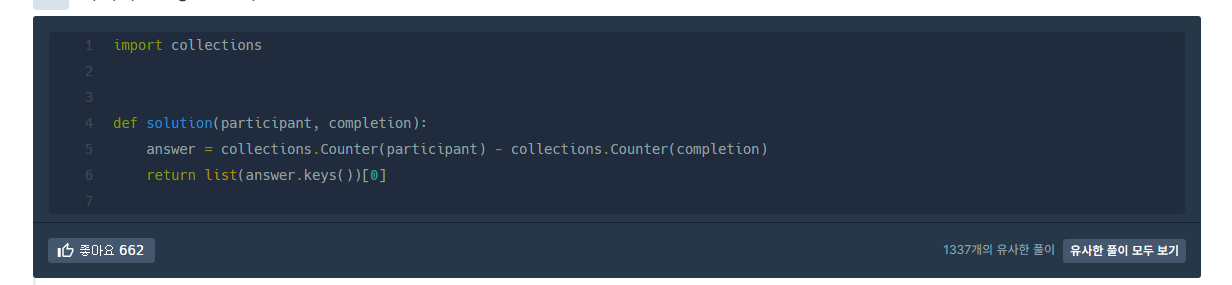    

In [18]:
import collections

In [20]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]

In [21]:
print(collections.Counter(participant))
print(collections.Counter(completion))

answer = collections.Counter(participant) - collections.Counter(completion)
print(answer)
print(f"answer -> {list(answer.keys())[0]}")

Counter({'mislav': 2, 'stanko': 1, 'ana': 1})
Counter({'stanko': 1, 'ana': 1, 'mislav': 1})
Counter({'mislav': 1})
answer -> mislav
